In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
data=pd.read_csv('cityhousing.csv',header=0)
data=data.dropna() #Удаление пропущенных данных
print(data.shape)
data.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00733,18.0,3.31,0,0.438,7.474,74.3,4.0900,1,397,14.3,4.98,34.0,0
1,0.03731,0.0,7.07,0,0.479,7.431,78.9,4.9771,3,343,17.8,9.14,31.7,0
2,0.03739,0.0,7.07,0,0.479,7.184,71.1,4.9771,3,343,17.8,4.03,34.7,1
3,0.03337,0.0,3.18,0,0.448,7.998,44.8,7.0733,3,333,18.7,3.94,33.4,1
4,0.07904,0.0,3.18,0,0.448,7.147,44.3,7.0733,3,333,18.7,4.33,37.3,1


In [39]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.840798   12.257708   11.753715    0.069170    0.544515    6.515194   
std      9.199840   23.859446    7.993086    0.253994    0.148226    1.334790   
min      0.007330    0.000000    0.470000    0.000000    0.384000    3.471000   
25%      0.082262    0.000000    4.740000    0.000000    0.437000    4.894750   
50%      0.339580    0.000000    9.790000    0.000000    0.473000    7.173500   
75%      3.789767   13.400000   18.100000    0.000000    0.713000    7.442250   
max     88.977300  100.000000   37.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    69.216008    4.039257   12.029644  467.096838   22.522727   13.977925   
std     27.811365    2.0614

In [40]:
print(list(data.columns))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT_MEDV']


Text(0, 0.5, 'MEDV')

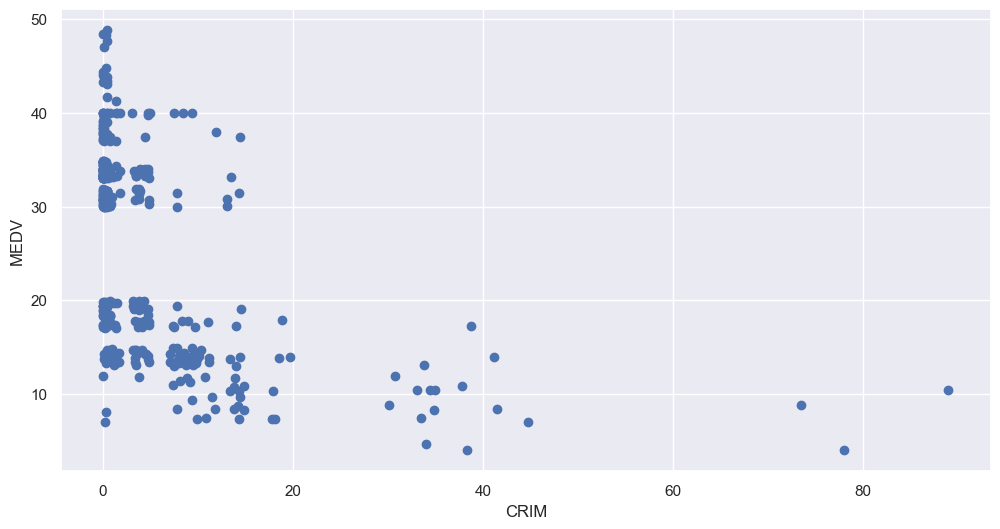

In [41]:
x = data.columns[0]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

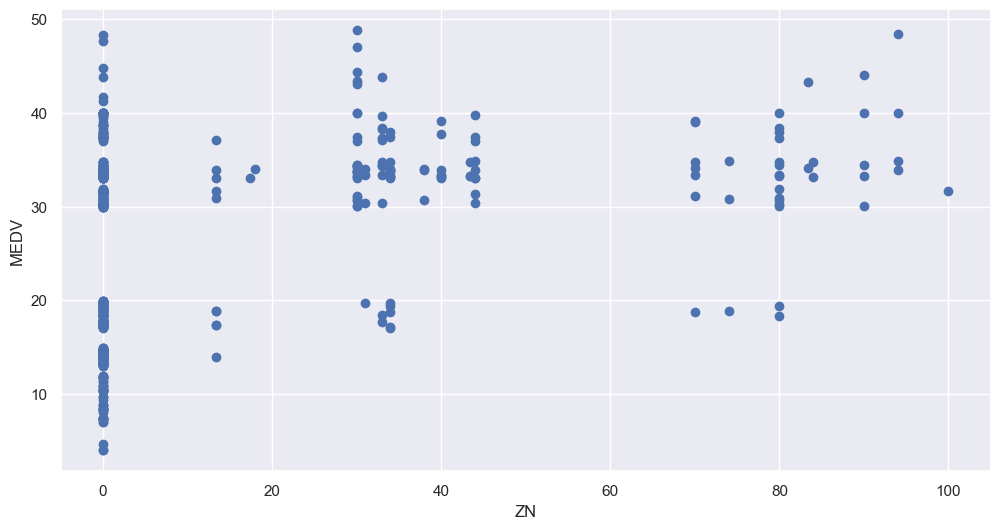

In [42]:
x = data.columns[1]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

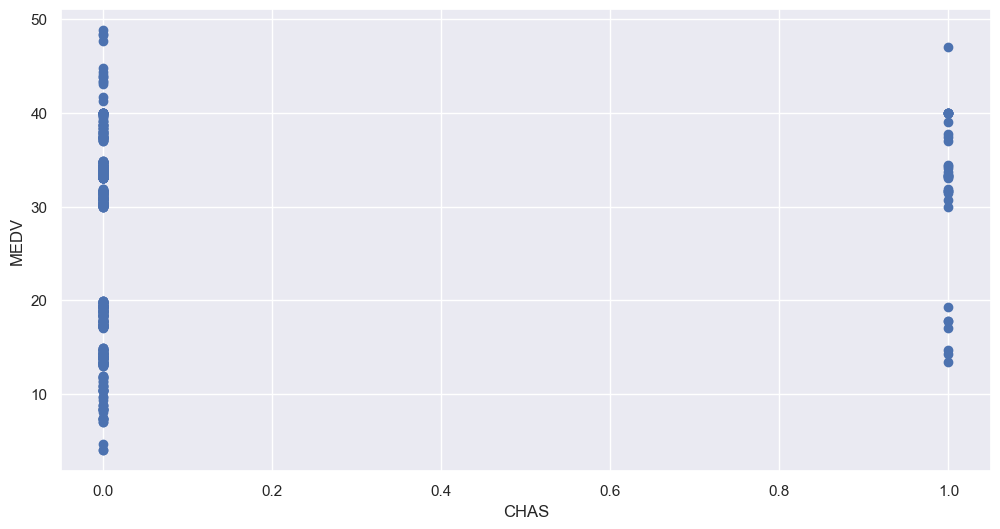

In [43]:
x = data.columns[3]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

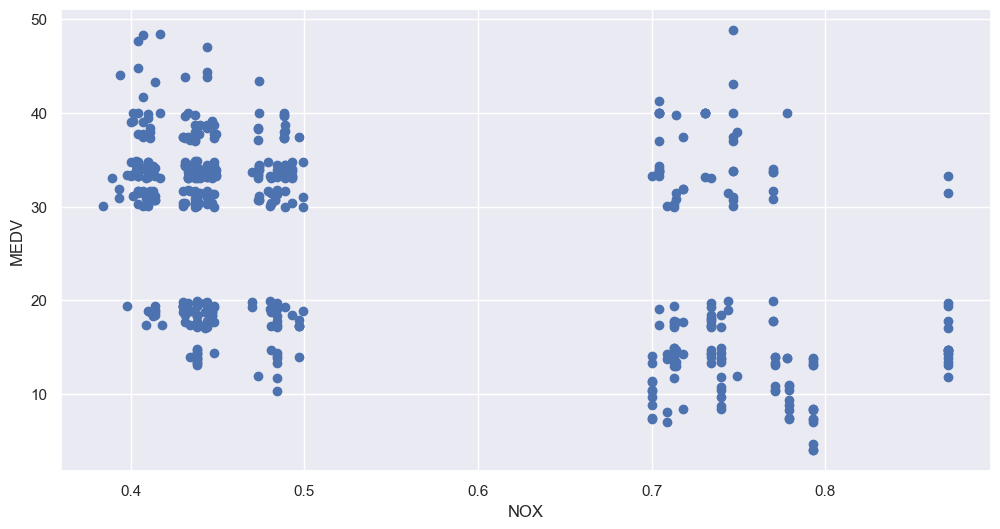

In [44]:
x = data.columns[4]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

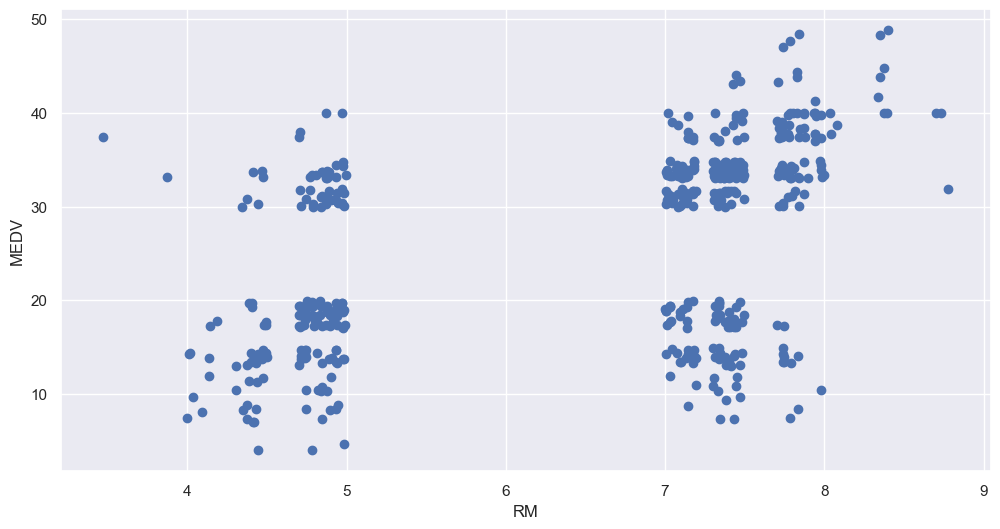

In [45]:
x = data.columns[5]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

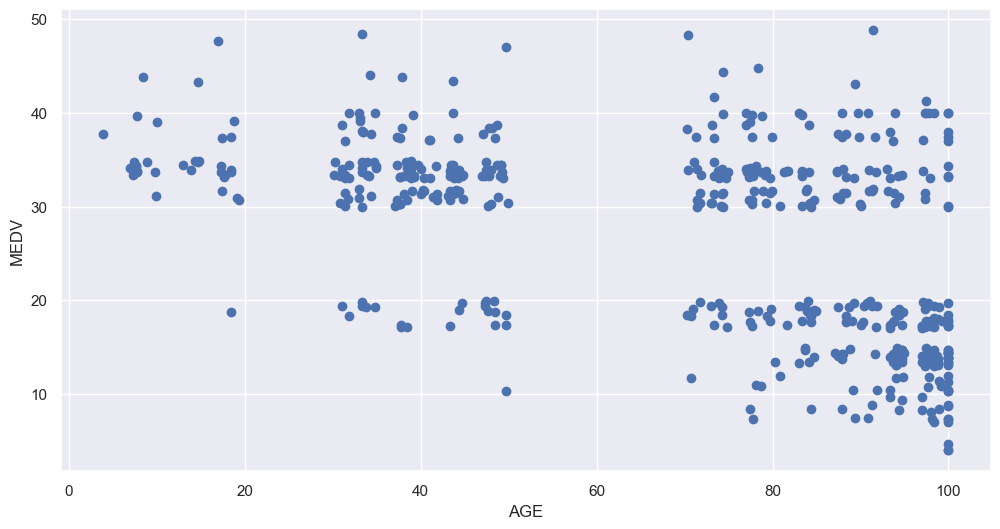

In [46]:
x = data.columns[6]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

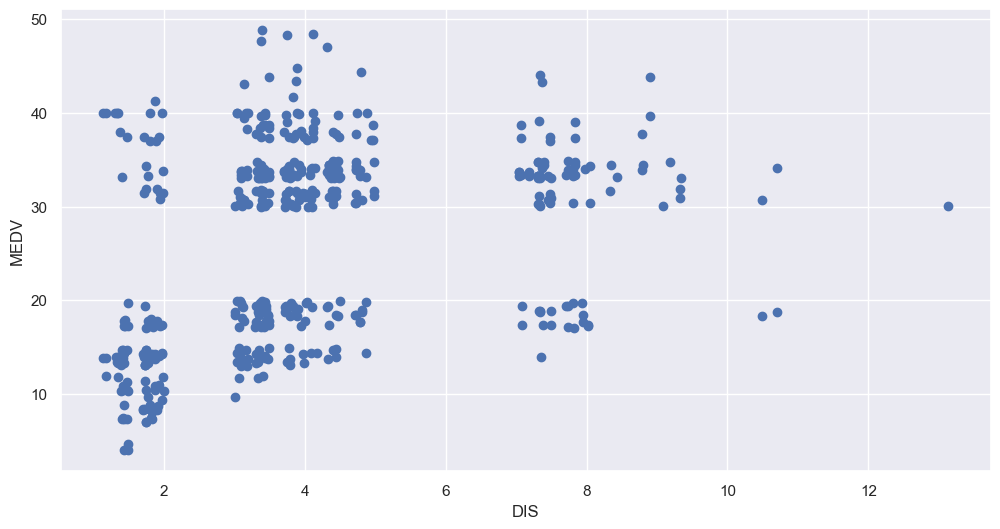

In [47]:
x = data.columns[7]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

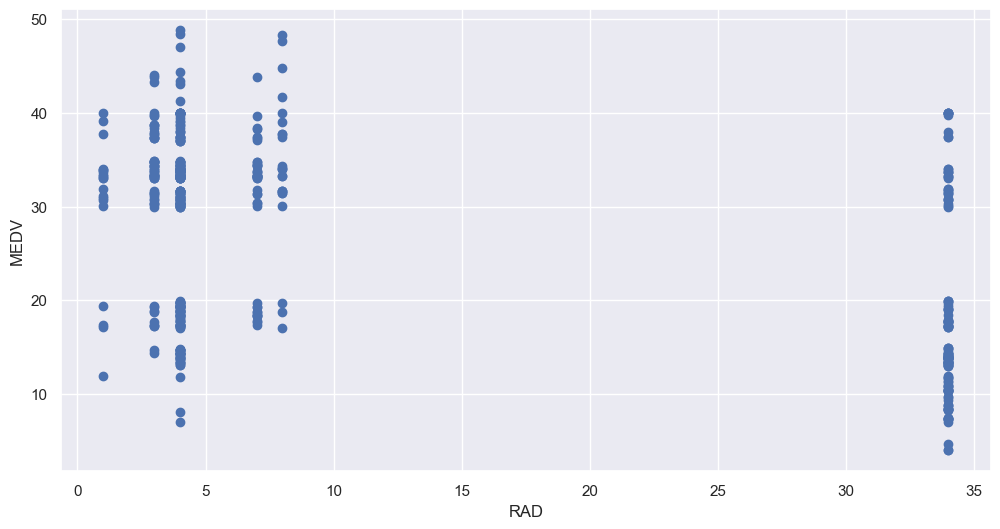

In [48]:
x = data.columns[8]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

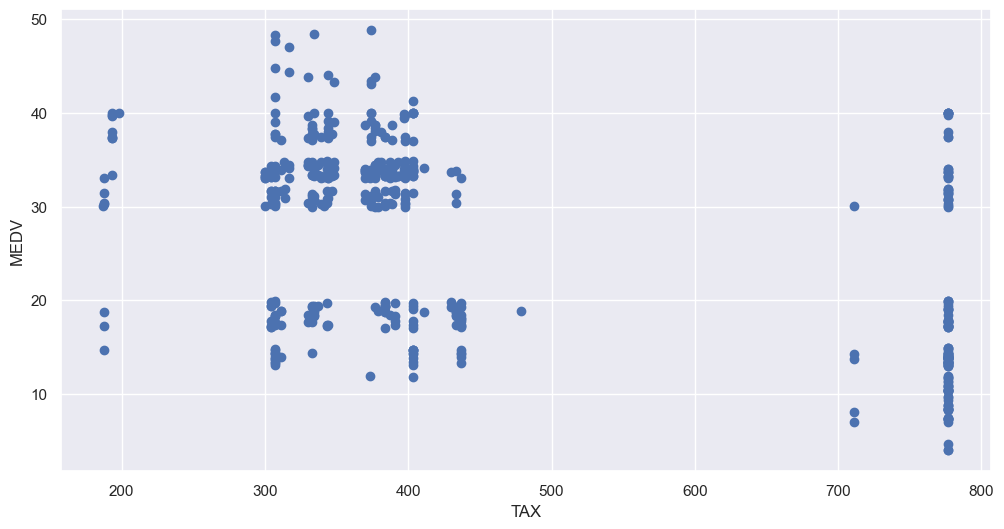

In [49]:
x = data.columns[9]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

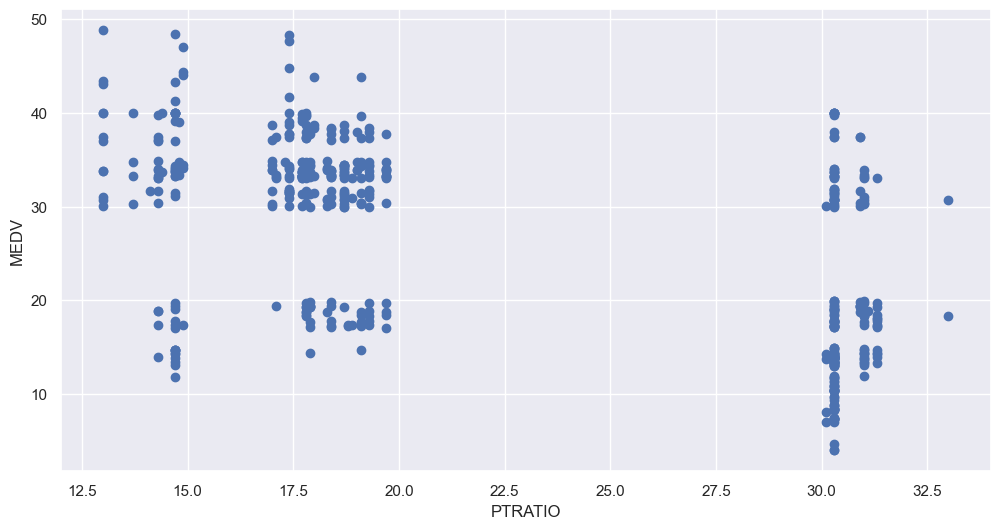

In [50]:
x = data.columns[10]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'MEDV')

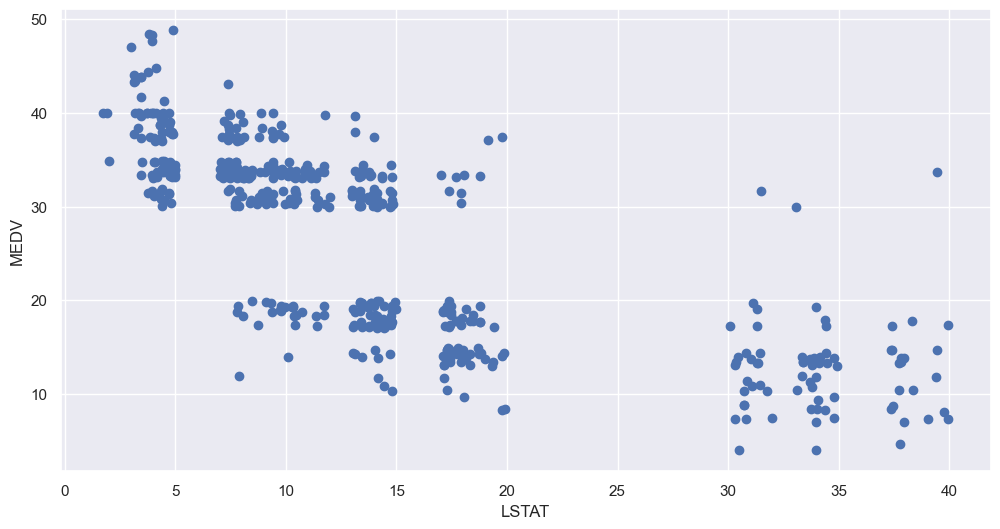

In [51]:
x = data.columns[11]
y = data.columns[12]
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)

In [52]:
#матрица корреляции
corr_matrix=data.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV        1.000000
RM          0.477756
CAT_MEDV    0.455689
DIS         0.351272
ZN          0.348663
CHAS        0.135610
RAD        -0.476004
CRIM       -0.477106
NOX        -0.485048
INDUS      -0.496538
TAX        -0.512480
AGE        -0.528679
PTRATIO    -0.576158
LSTAT      -0.760523
Name: MEDV, dtype: float64

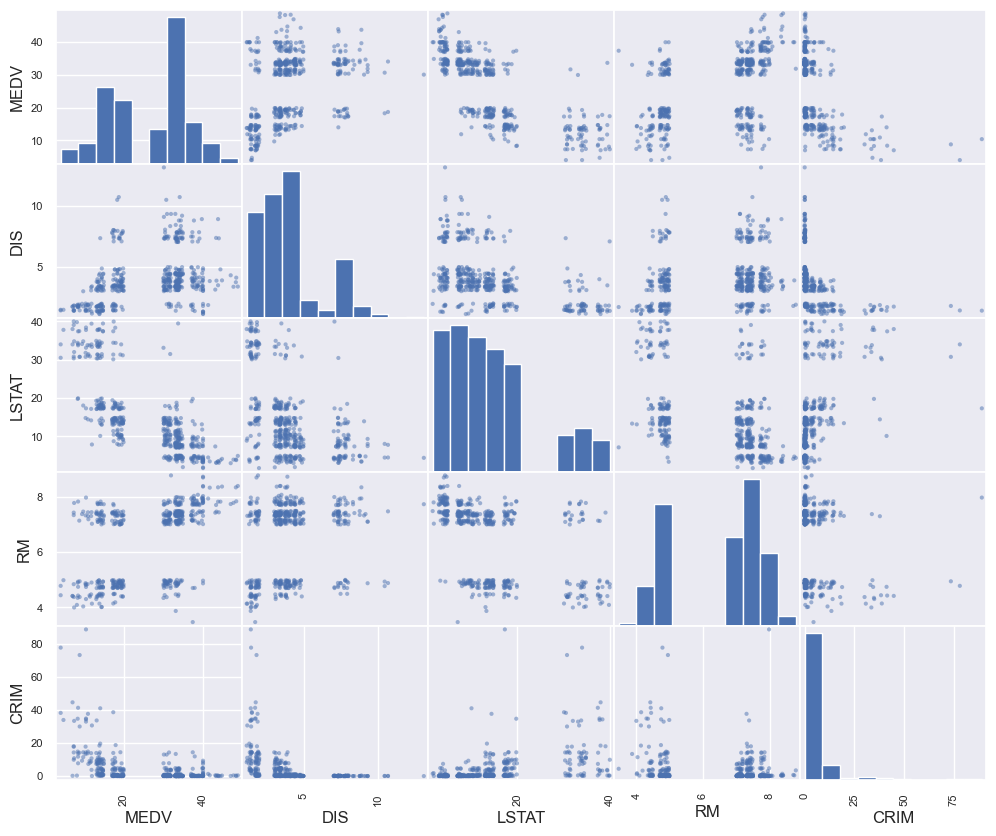

In [53]:
attr = ["MEDV", "DIS", "LSTAT", "RM", "CRIM"]
scatter_matrix(data[attr], figsize=(12,10))
plt.show()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,0.21,0.32,0.06,0.46,0.20,0.35,0.40,0.62,0.60,0.43,0.48,0.48,0.15
ZN,0.21,1.00,0.50,0.04,0.36,0.24,0.55,0.65,0.32,0.32,0.41,0.38,0.35,0.38
INDUS,0.32,0.50,1.00,0.04,0.67,0.30,0.60,0.64,0.46,0.55,0.52,0.53,0.50,0.32
CHAS,0.06,0.04,0.04,1.00,0.08,0.03,0.08,0.11,0.02,0.02,0.11,0.04,0.14,0.11
NOX,0.46,0.36,0.67,0.08,1.00,0.19,0.63,0.65,0.57,0.65,0.38,0.51,0.49,0.13
RM,0.20,0.24,0.30,0.03,0.19,1.00,0.22,0.20,0.11,0.15,0.23,0.48,0.48,0.36
AGE,0.35,0.55,0.60,0.08,0.63,0.22,1.00,0.67,0.44,0.46,0.44,0.56,0.53,0.18
DIS,0.40,0.65,0.64,0.11,0.65,0.20,0.67,1.00,0.46,0.50,0.39,0.48,0.35,0.12
RAD,0.62,0.32,0.46,0.02,0.57,0.11,0.44,0.46,1.00,0.95,0.68,0.47,0.48,0.20
TAX,0.60,0.32,0.55,0.02,0.65,0.15,0.46,0.50,0.95,1.00,0.70,0.49,0.51,0.24


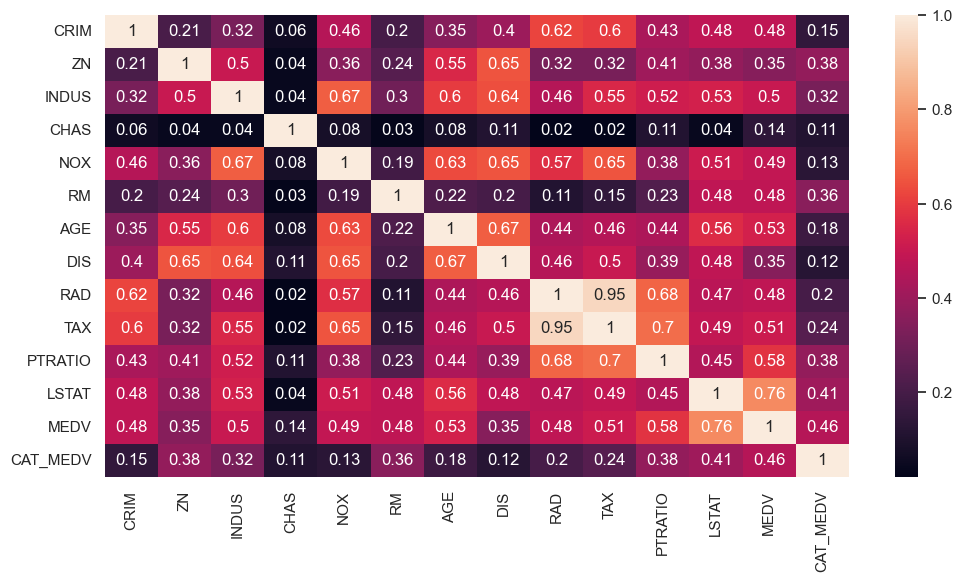

In [54]:
cor_matrix = data.corr().abs().round(2)
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(data=cor_matrix , annot=True)
cor_matrix

In [55]:
print(list(data.columns))
data.head()

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT_MEDV']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00733,18.0,3.31,0,0.438,7.474,74.3,4.0900,1,397,14.3,4.98,34.0,0
1,0.03731,0.0,7.07,0,0.479,7.431,78.9,4.9771,3,343,17.8,9.14,31.7,0
2,0.03739,0.0,7.07,0,0.479,7.184,71.1,4.9771,3,343,17.8,4.03,34.7,1
3,0.03337,0.0,3.18,0,0.448,7.998,44.8,7.0733,3,333,18.7,3.94,33.4,1
4,0.07904,0.0,3.18,0,0.448,7.147,44.3,7.0733,3,333,18.7,4.33,37.3,1


In [56]:
data.drop(data.columns[[3, 8 ]], axis = 1, inplace = True)

In [57]:
print(list(data.columns))
data.head()

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT_MEDV']


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00733,18.0,3.31,0.438,7.474,74.3,4.0900,397,14.3,4.98,34.0,0
1,0.03731,0.0,7.07,0.479,7.431,78.9,4.9771,343,17.8,9.14,31.7,0
2,0.03739,0.0,7.07,0.479,7.184,71.1,4.9771,343,17.8,4.03,34.7,1
3,0.03337,0.0,3.18,0.448,7.998,44.8,7.0733,333,18.7,3.94,33.4,1
4,0.07904,0.0,3.18,0.448,7.147,44.3,7.0733,333,18.7,4.33,37.3,1


In [58]:
pipeline = Pipeline([('scaler', StandardScaler()),('regression', LinearRegression())])

In [59]:
X = data.loc[:,data.columns!='MEDV']
Y = data.loc[:,data.columns=='MEDV']
Y=Y['MEDV']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 11)
(102, 11)
(404,)
(102,)


In [61]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [62]:
Y_pred = pipeline.predict(X_test)

In [63]:
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

RMSE: 6.9398741070556405
MSE: 48.16185262178133
MAE: 5.415129627600028


D:\FP-37\Repository\125_Pilyutik_Fedor\Notes\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Real values')

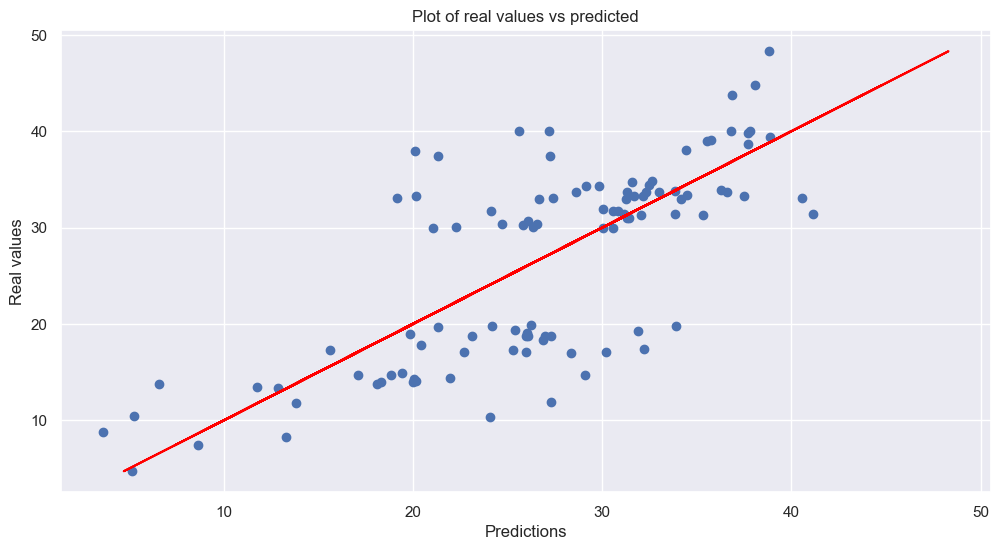

In [64]:
plt.scatter(Y_pred, Y_test)
plt.plot(Y_test, Y_test, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')